# 7. 최단 경로 알고리즘

    * 가장 짧은 경로를 찾는 알고리즘

## 다양한 문제 상황

    1. 한 지점에서 다른 한 지점까지의 최단 경로
    2. 한 지점에서 다른 모든 지점까지의 최단 경로
    3. 모든 지점에서 다른 모든 지점까지의 최단 경로
    
* 각 지점은 그래프에서 노드로 표현
* 지점 간 연결된 도로는 그래프에서 간선으로 표현

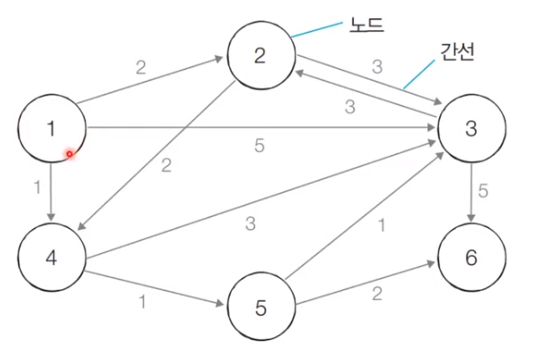

In [5]:
from IPython.display import Image

Image("img/node_edge.png")

# 다익스트라 최단 경로 알고리즘

    * 줄여서 다익스트라 알고리즘, 가장 기본적인 최단 경로 알고리즘
    
### 특정한 노드에서 출발하여, 다른 모든 노드로 가는 최단 경로를 모두 계산함
    * 음의 간선이 없을 때, 정상적으로 동작
    * 다익스트라 알고리즘은 그리디 알고리즘으로 분류
         * 매 상황에서 가장 비용이 적은 노드를 선택해 임의의 과정을 반복
    * 최단 경로 문제는 DP 문제로 분류되기도 함
    
## 동작 과정

1. 출발 노드를 설정
2. 최단 거리 테이블을 초기화  
    => 자기 자신은 0, 나머지는 무한대로 초기화
3. 방문하지 않은 노드 중에서 __최단거리가 가장 짧은 노드__를 선택  
    => 순간 최적 과정을 선택하므로 그리디 알고리즘의 일종임
4. 해당 노드를 거쳐 다른 노드로 가는 비용을 계산하여 최단 거리 테이블을 갱신
5. 3-4과정을 반복

## 특징
* 총 O(V)번에 걸쳐서 최단 거리가 가장 짧은 노드를 매번 선형 탐색해야 함
    * v : 노드의 갯수
* 전체 시간 복잡도 : O(V^2)
* 일반적으로 최단 경로 문제에서 노드의 갯수가 5000개 이하면 해결 가능  

### 코딩테스트 문제를 풀 때, 파이썬을 기준으로 1초에 약 2천만번 정도 연산이 합리적임
  
  
    * 노드의 갯수가 10000개가 넘어가면?? 
        * 복잡도가 1억이 넘어가므로 시간 초과 가능성 있음
        * 이 해결을 위해 우선 순위 큐(Priority Queue)를 이용한다.
            1. 최소/최대 힙(heaq)을 이용하여 주로 우선순위 큐를 구현한다.
                * 힙에서 데이터 삽입 or 삭제 복잡도 = O(logN)
            2. 우선순위 큐 라이브러리를 이용한다(queue.PriorityQueue)

![nn](img/7-2.png)

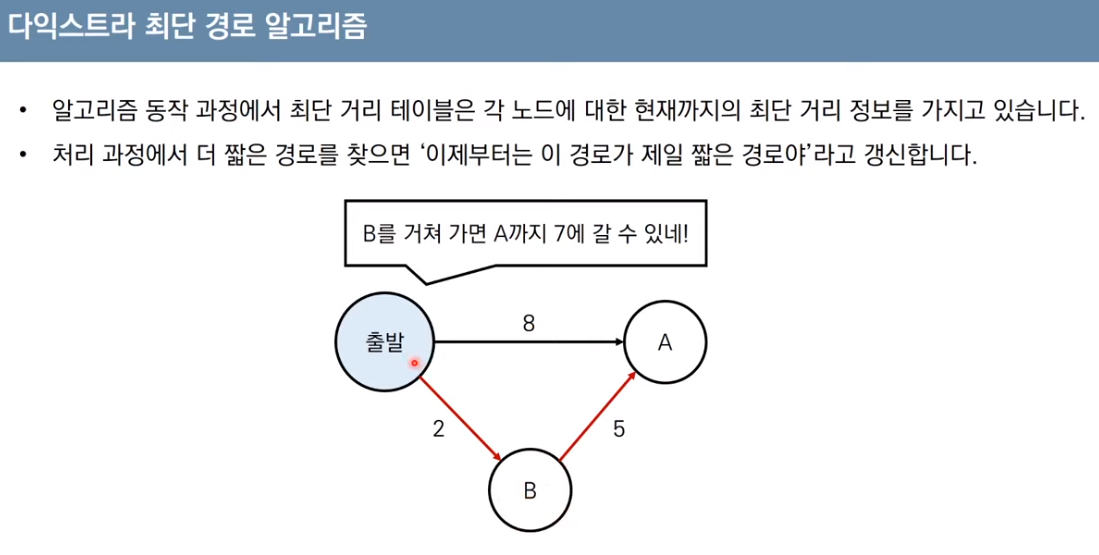

In [7]:
Image('img/7-2.png')

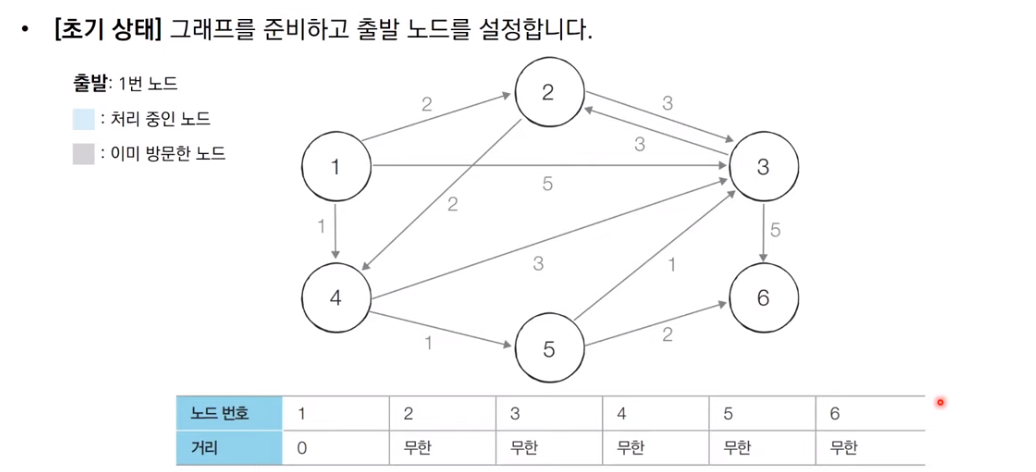

In [8]:
Image('img/7-3.png')

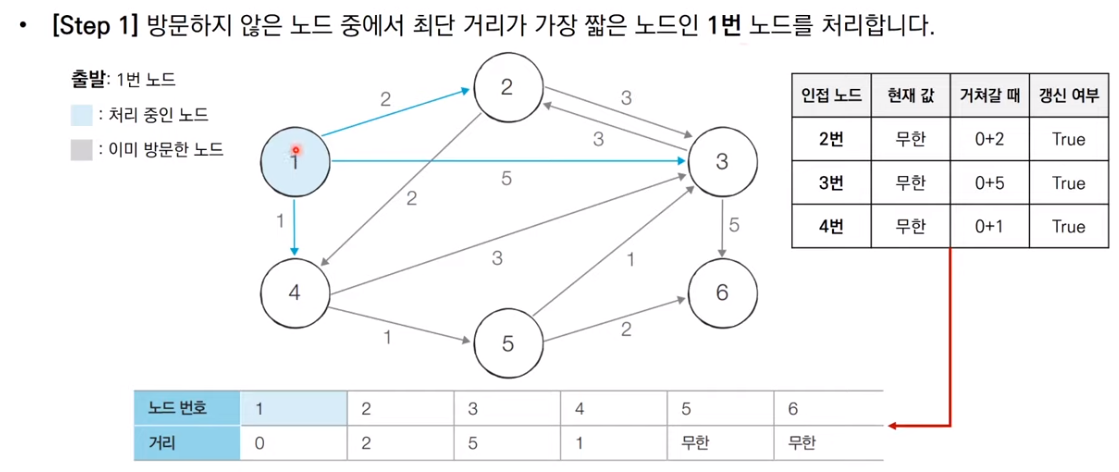

In [9]:
Image('img/7-4.png')

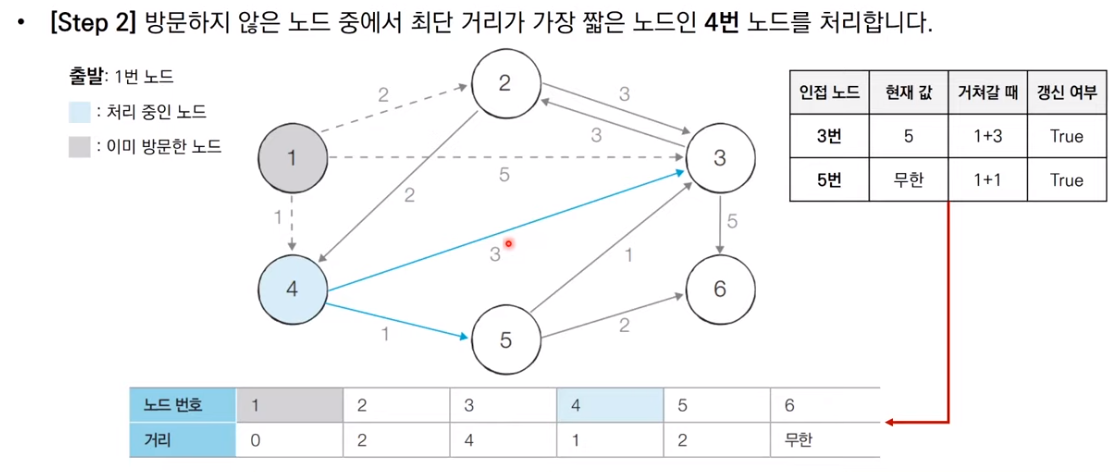

In [10]:
Image('img/7-5.png')

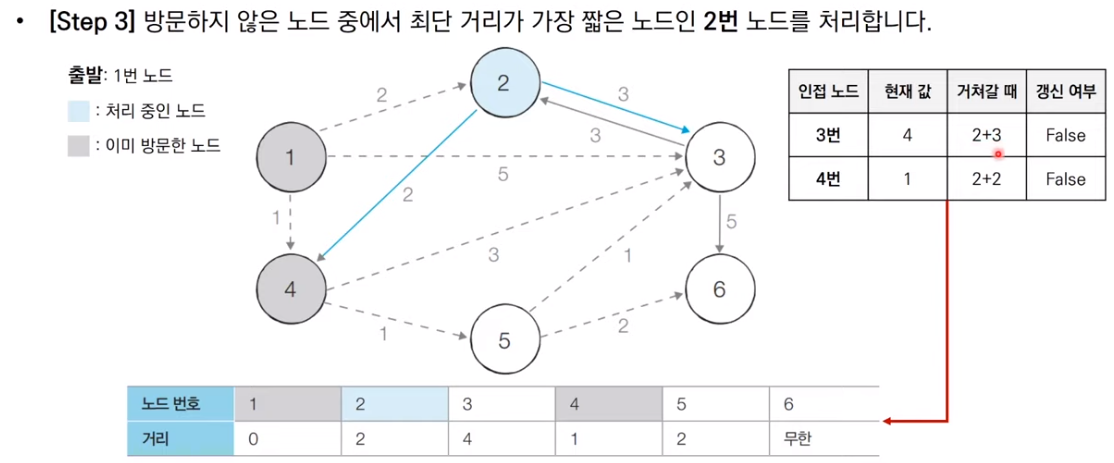

In [11]:
Image('img/7-6.png')

    * 여기서 노드2까지 거리와 노드5까지 거리가 같은데 이럴 때는 보통 숫자가 작은 것부터 처리한다.

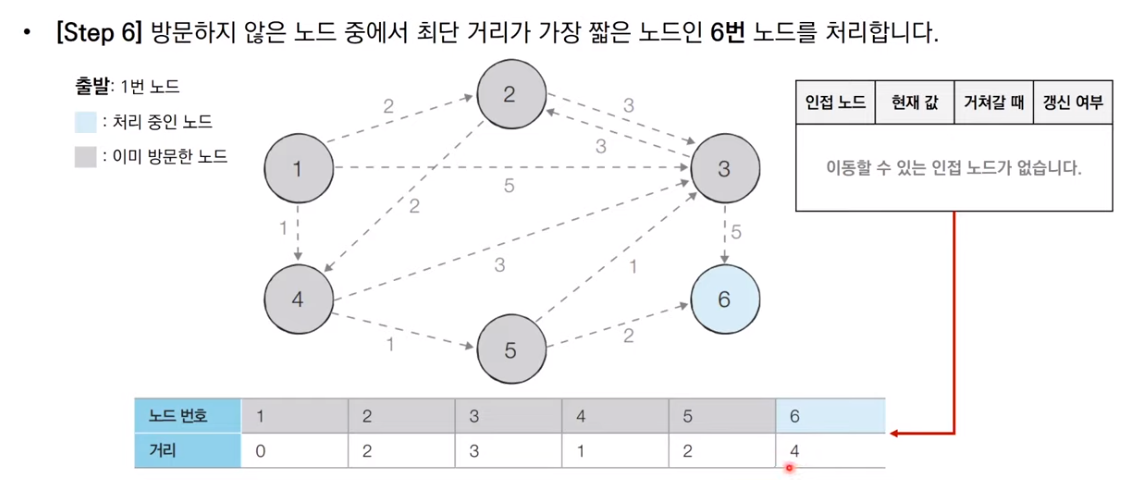

In [12]:
Image('img/7-7.png')

    * 다익스트라 알고리즘에서 마지막 노드는 처리하지 않아도 결과 똑같음
    * 현재 예제에서는 마지막 노드에서 출발하는 간선이 없으므로 어차피 처리를 못함

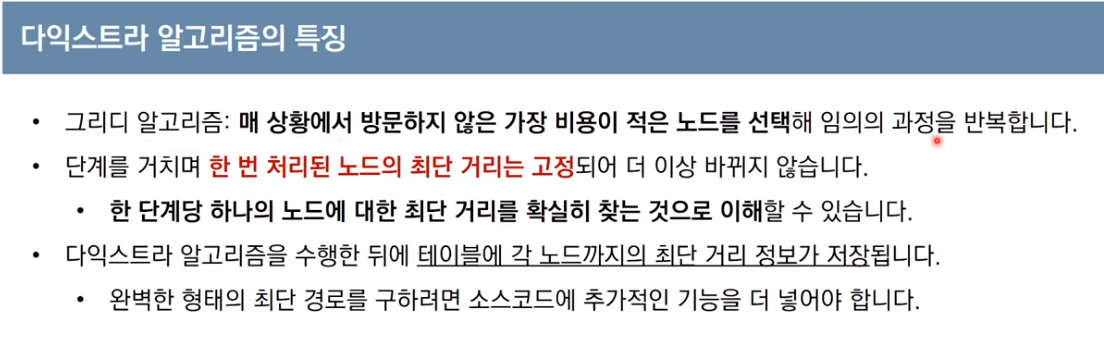

In [13]:
Image('img/7-8.png')

 * 1->6 최단 거리 예시 : 4
 * 1->6 최단 경로 예시 : 1 -> 4 -> 5 -> 6

## 다익스트라 알고리즘 구현 방법


### 1. 단계마다 방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택하기 위해, 매 단계마다 1차원 테이블의 모든 원소를 확인(순차 탐색)합니다.

In [14]:
import sys
# input = sys.stdin.readline

INF = int(1e9)  # 무한을 의미하는 값으로 10억 설정, 1e9의 기본 타입은 float여서 int로 바꿔줌

# n : 노드의 갯수, m : 간선의 갯수
n, m = map(int, input().split())

# 시작 노드 번호를 입력 받기
start = int(input())

# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트 생성
graph = [[] for i in range(n+1)]

# 방문 체크 리스트
visited = [False] + (n+1)

# 최단 거리 테이블 => 무한으로 초기화
distance = [INF] + (n+1)


# 간선 정보 입력 받기
# a 노드에서 b 노드로 가는 거리가 c 라는 의미
for _ in range(m):
    a, b, c = map(int, input().split())
    graph[a].append((b, c))
    
# 방문하지 않은 노드 중에서 가장 최단 거리가 짧은 노드를 반환하는 함수
def get_smallest_node():
    min_value = INF # 최소 거리 값
    index = 0 # index = 최소 거리의 노드
    
    for i in range(1, n+1):
        if distance[i] < min_value and not visited[i]: # 방문하지 않은 노드 모두 뒤져서 제일 작은 값 찾기
            min_value = distance[i]
            index = i
    return index


# 다익스트라 알고리즘 = 최단 경로 찾는 함수
def dijkstra(start):
    
    # 시작 노드에 대해서 초기화
    distance[start] = 0
    visited[start] = True
    
    # dist 리스트를 시작 노드에 연결된 거리정보로 갱신
    for j in graph[start]: # j = (start에 연결된 노드, 거리)
        distance[j[0]] = j[1]
        
    for i in range(n-1): # 전체 노드의 갯수에서 start 노드를 뺀 횟수
        
        # 현재 최단 거리가 가장 짧은 노드 반환
        now = get_smallest_node()
        visited[now] = True
        
        for j in graph[now]: # j = (now에 연결된 노드, 거리)
            cost = distance[now] + j[1]
            
            # 기존 경로와 now를 통한 경로 비교 후, 갱신
            if cost < distance[j[0]]:
                distance[j[0]] = cost

# 알고리즘 수행
dijkstra(start)

# 모든 노드로 가기위한 최단 거리 출력
for i in range(n+1):
    # 도달할 수 없는 경우 무한이라 출력
    if distance[i] == INF:
        print("Infinity")
    else:
        print(distance[i])

KeyboardInterrupt: Interrupted by user

### 파이썬 최소 힙 이용
    * 이후 최단 거리 노드 구할 때 사용

In [15]:
import heapq

# 최소 힙을 사용한 힙 정렬
def heapsort(iterable):
    h=[]
    result = []
    
    # 그냥 h에 죄다 때려 넣고
    for i in iterable:
        heapq.heappush(h, i)
    
    # 다시 꺼내서 result에 집어넣음
    for i in range(len(h)):
        result.append(heapq.heappop(h))
        
    return result

result = heapsort([1,3,5,7,9,2,4,6,8,0])
print(result)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 최대 힙

In [17]:
import heapq

# 최대 힙을 사용한 힙 정렬
def heapsort(iterable):
    h=[]
    result = []
    
    # 그냥 h에 죄다 때려 넣고
    for i in iterable:
        heapq.heappush(h, -i)    # -1 추가
    
    # 다시 꺼내서 result에 집어넣음
    for i in range(len(h)):
        result.append(-heapq.heappop(h))    # -1 추가
        
    return result

result = heapsort([1,3,5,7,9,2,4,6,8,0])
print(result)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


## queue 모듈의 우선순위 큐 이용

    * 객체명 = PrioriyQueue() : 객체 생성
    * 객체명.put(값) : 값 삽입
    * 객체명.get(값) : 값 출력
    
### 값은 (우선순위, 데이터) 튜플로 들어가야함

In [26]:
from queue import PriorityQueue

INF = int(1e9)

# distance 리스트의 인덱스 = 노드명, 리스트의 값 = 노드까지의 거리
distance = [INF, 1,3,5,7,9,2,4,6,8,0]
result = []

q = PriorityQueue()

for i in range(1, len(distance)):
    q.put((distance[i], i))
    
for i in range(q.qsize()):   # PriorityQueue는 len(q)가 아닌, q.qsize()를 써야함
    result.append(q.get())
    
print(result) #(거리, 노드)로 출력

[(0, 10), (1, 1), (2, 6), (3, 2), (4, 7), (5, 3), (6, 8), (7, 4), (8, 9), (9, 5)]


In [24]:
from queue import PriorityQueue

a = PriorityQueue()

a.qsize()

0

## 개선된 다익스트라 알고리즘(heapq 이용)

    * visited를 사용하지 않음
        * 단순히 우선순위 큐에서 꺼낸 거리가 현재 최소거리보다 작은지만 판단(즉, 현재 들어온 간선이 최단 경로로 온것 인지만 판단)
    * 힙구조를 사용하는 다익스트라 알고리즘의 시간 복잡도는 O(ElogV)
        * E : 최대 간선의 갯수, V 노드의 갯수
        * 원래는 시간복잡도를 O(ElogE)로 판단할 수도 있음
            * 간선을 넣었다 뺏다하는 과정이 => ELogE임
            * 여기서 E의 최대 값이 V^2이고, 
            * 그게 ElogV^2 = 2ElogV가 되어서
            * O(ElogV)

In [ ]:
import heapq
import sys
# input = sys.stdin.readline

INF = int(1e9)

n, m = map(int, input().split())

start = int(input())

# graph 리스트는 각 인덱스(=노드 번로)에 [노드(=인덱스)에 연결된 노드, 거리]를 요소로 갖는 리스트를 가짐
# 즉, 3중 리스트임 [[0에 대한] [[2, 1-2 거리], [3, 1-3거리]], [[3, 2-3 거리], [4, 2-4거리]], [3에 대한], [4에 대한]]
# 정확히는 2중 리스트지만, 리스트의 최종 요소가 튜플() 형태로 3중 같은 느낌임
graph = [[] for _ in range(n+1)]
# visited = [False] * (n+1)
distance = [INF] * (n+1)

# a, b, c : a노드에서 b노드 만큼 가는 거리가 c임
for i in range(m):
    a, b, c = map(int, input().split())
    graph[a].append((b, c))
    
def dijkstra2(start):
    
    q = []  # q : 우선 순위 큐
    heapq.heappush(q, (0, start))   # q에 (시작점 부터 노드까지 총 거리, 노드) 형태로 start 삽입
    distance[start] = 0
#     visited[start] = True

    while q: # 큐가 비어있지 않다면
        dist, now = heapq.heappop(q) # dist : now까지 오는데 걸린 총 거리 (cost)
        
        if distance[now] < dist: # 최소거리가 아니면 무시 
            continue
            
        for i in graph[now]:
            cost = dist + i[1]    # dist: now 까지 거리, i[1]: now에서 i[0]까지 거리
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0])) # 비용과 노드 넣기
                # 이렇게 now에 연결된 노드에 대한 (cost, 노드)를 모두 넣어주면,
                # q가 알아서 거리가 최소인 값을 반환해줌

dijkstra(start)

for i in range(1, n+1):
    
    if distance[i] = INF:
        print("inf")
    else:
        print(distance[i])

### 주의 사항
    * 리스트 안에 빈 리스트 요소를 넣을 떄는 *가 아니라 반복문을 사용해여함

In [32]:
n = 5

graph0 = [[0]*(n+1)]  ## 요소가 있으면, 요소만 반복됨
graph1 = [[]*(n+1)]   ## 요소가 없으면, 반복이 안됨
graph2 = [[] for i in range(n+1)]   # 리스트 자체를 반복하려면, 반복문을 써야함

print(graph0)
print(graph1)
print(graph2)

[[0, 0, 0, 0, 0, 0]]
[[]]
[[], [], [], [], [], []]
